In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
nf = 3.48
ns = 1.45
nc = 1.00
a  = 1.0e-6
lmbd = 3e-6
c0 = 299792458
pi = np.pi
arredondamento = 6
u0 = 4*pi* 1e-7
e0 = 1/(u0*c0**2)


# Modo TM


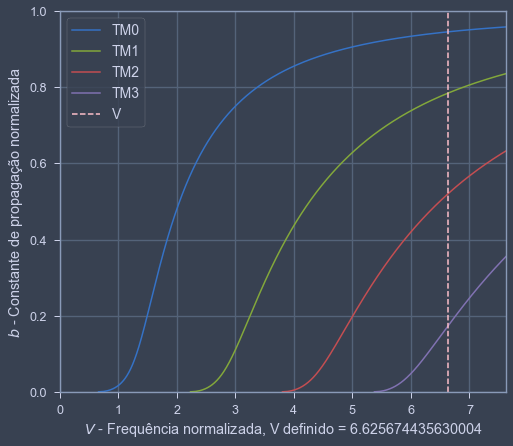

In [7]:
k0 = 2*np.pi/lmbd 
Vescolhido = k0*a*np.sqrt(nf**2 - ns**2)
sigma = (ns**2 - nc**2)/(nf**2 - ns**2)
omega = k0*c0
b  = np.linspace(1e-10, .99, 1000)
pc = (nf**2)/(nc**2)
ps = (nf**2)/(ns**2)
nm =int(1 +np.floor((2*Vescolhido - np.arctan(pc*np.sqrt(sigma)))/np.pi))
Vm = []
for m in range(nm):
  V = 1/(2*np.sqrt(1-b))*(m*np.pi + np.arctan(pc*np.sqrt((b+sigma)/(1-b))) + np.arctan(ps*np.sqrt((b)/(1-b))))
  Vm.append(V)
  beta = np.sqrt(b*k0**2*(nf**2-ns**2)+k0**2*ns**2)
  neff = beta/k0
  plt.plot(V, b, label = 'TM{0}'.format(m))



plt.axvline(Vescolhido,label = "V",color="pink",ls='--')
plt.xlim([0,Vescolhido + 1])
plt.ylim([0,1])
plt.xlabel('$V$ - Frequência normalizada, V definido = {0}'.format(Vescolhido))
plt.ylabel(r'$b$ - Constante de propagação normalizada')
plt.grid(True)
plt.legend(fontsize = 14)

In [8]:
tol = 1e-10
r = 0.5
R = k0*a*np.sqrt(nf**2-ns**2) # V
u = np.zeros(nm)
u1 = np.zeros(nm)
v = np.zeros(nm)
w = np.zeros(nm)
bnormalizado = np.zeros(nm)
for m in range(nm):
    u[m] = 20
    u1[m] = R
    v[m] = 0
    w[m] = R*np.sqrt(sigma)
    while(np.absolute(u1[m]-u[m])>tol):
        u[m] = u1[m]
        F = m*pi/2 + np.arctan(ps*(v[m]/u[m]))/2 + np.arctan(pc*(w[m]/u[m]))/2
        u1[m] = r*F + (1-r)*u[m]
        v[m] = np.sqrt(R**2 - u1[m]**2)
        w[m] = np.sqrt((R**2)*sigma + v[m]**2)
    bnormalizado[m] = (v[m]/R)**2
    print("Para TM{0}: u = {1}, v = {2}, w = {3}, beta normalizado = {4}".format(m,round(u[m],arredondamento),round(v[m],arredondamento),round(w[m],arredondamento),round(bnormalizado[m],arredondamento)))


Para TM0: u = 1.540713, v = 6.444049, w = 6.808955, beta normalizado = 0.945927
Para TM1: u = 3.075964, v = 5.86839, w = 6.266906, beta normalizado = 0.784473
Para TM2: u = 4.593624, v = 4.774744, w = 5.256832, beta normalizado = 0.519326
Para TM3: u = 6.030619, v = 2.744303, w = 3.516718, beta normalizado = 0.171555


In [9]:
phi = np.zeros(nm)
beta = np.zeros(nm)
kf = np.zeros(nm)
alphas = np.zeros(nm) 
alphac = np.zeros(nm)
for m in range(nm):
    phi[m] = m*pi/2 + np.arctan(pc*(w[m]/u[m]))/2 - np.arctan(ps*(v[m]/u[m]))/2
    beta[m] = np.sqrt(bnormalizado[m]*(k0**2)*(nf**2 - ns**2) + (k0*ns)**2)
    kf[m] = np.sqrt(k0**2 * nf**2 - beta[m]**2)
    alphas[m] = np.sqrt(beta[m]**2 - k0**2 * ns**2)
    alphac[m] = np.sqrt(beta[m]**2 - k0**2 * nc**2)
    print("Para Tm{0}: β = {1}, Φ = {2}, kf = {3}, αs = {4}, αc = {5}".format(m,round(beta[m],arredondamento),round(phi[m],arredondamento),round(kf[m],arredondamento),round(alphas[m],arredondamento),round(alphac[m],arredondamento)))

Para Tm0: β = 7123788.54928, Φ = 0.011401, kf = 1540712.638219, αs = 6444048.905261, αc = 6808955.312669
Para Tm1: β = 6607617.038866, Φ = 1.595918, kf = 3075964.205921, αs = 5868390.403753, αc = 6266906.101689
Para Tm2: β = 5658690.068146, Φ = 3.188326, kf = 4593624.434048, αs = 4774743.583259, αc = 5256831.977761
Para Tm3: β = 4093139.79945, Φ = 4.82429, kf = 6030618.982375, αs = 2744302.537327, αc = 3516717.585038


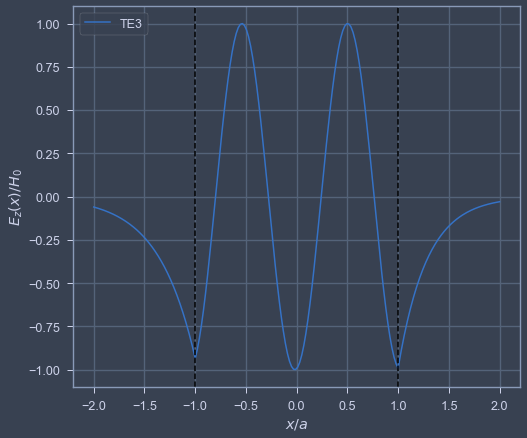

In [10]:
#plot Ez
E1 = 1
xs = np.linspace(-2*a,-a,num = 100)
xf = np.linspace(-a,a,num = 100)
xc = np.linspace(a,2*a,num = 100)
cores = ['b','g','r','c','m','y','w']
Ezf = np.zeros(nm)
Ezc = np.zeros(nm)
Ezs = np.zeros(nm)

for m in range(nm):
    Ezf = E1*np.sin(kf[m]*xf + phi[m])
    Ezc = E1*np.sin(kf[m]*a + phi[m])*np.exp(-alphac[m]*(xc-a))
    Ezs = -E1*np.sin(kf[m]*a - phi[m])*np.exp(alphas[m]*(xs+a))
    if m > 2:
        plt.plot(np.concatenate([xs,xf,xc])/a,np.concatenate([Ezs,Ezf,Ezc]),label = 'TM{0}'.format(m))
plt.axvline(1,color='black',ls='--')
plt.axvline(-1,color='black',ls='--')   
plt.legend(loc = 'upper left')
plt.xlabel(r'$\it{x/a}$')
plt.ylabel(r'$\it{E_z(x)/H_0}$');

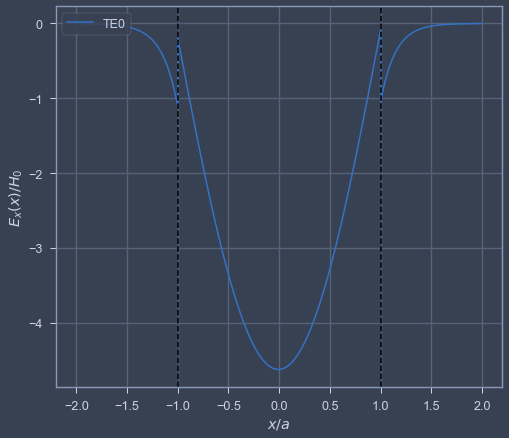

In [11]:
#Plot Ex

E1 = 1
xs = np.linspace(-2*a,-a,num = 100)
xf = np.linspace(-a,a,num = 100)
xc = np.linspace(a,2*a,num = 100)
cores = ['b','g','r','c','m','y','w']

Exf = np.zeros(nm)
Exc = np.zeros(nm)
Exs = np.zeros(nm)

for m in range(nm):
    Exf = -beta[m]*E1*np.cos(kf[m]*xf + phi[m])/kf[m] #*j
    Exc =-beta[m]*E1*np.sin(kf[m]*a + phi[m])*np.exp(-alphac[m]*(xc-a))/alphac[m] #*j
    Exs = -beta[m]*E1*np.sin(kf[m]*a - phi[m])*np.exp(alphas[m]*(xs+a))/alphas[m] #*j
    if m == 0:
        plt.plot(np.concatenate([xs,xf,xc])/a,np.concatenate([Exs,Exf,Exc]),label = 'TM{0}'.format(m))
plt.axvline(1,color='black',ls='--')
plt.axvline(-1,color='black',ls='--')
plt.legend(loc = 'upper left')
plt.xlabel(r'$\it{x/a}$')
plt.ylabel(r'$\it{E_x(x)/H_0}$');


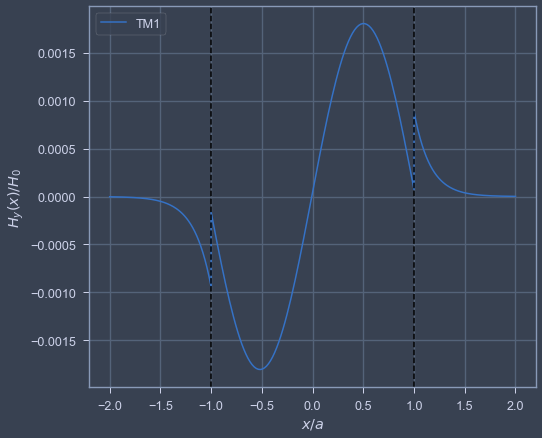

In [21]:

ntm = beta/(omega*e0)

E1 = 1
xs = np.linspace(-2*a,-a,num = 100)
xf = np.linspace(-a,a,num = 100)
xc = np.linspace(a,2*a,num = 100)
cores = ['b','g','r','c','m','y','w']

Hyf = np.zeros(nm)
Hyc = np.zeros(nm)
Hys = np.zeros(nm)

for m in range(nm):
    Hyf = -beta[m]*E1*np.cos(kf[m]*xf + phi[m])/(kf[m]*ntm[m]) #*j
    Hyc = -beta[m]*E1*np.sin(kf[m]*a + phi[m])*np.exp(-alphac[m]*(xc-a))/(alphac[m]*ntm[m]) #*j
    Hys = -beta[m]*E1*np.sin(kf[m]*a - phi[m])*np.exp(alphas[m]*(xs+a))/(alphas[m]*ntm[m]) #*j
    if m == 1:
        plt.plot(np.concatenate([xs,xf,xc])/a,np.concatenate([Hys,Hyf,Hyc]),label = 'TM{0}'.format(m))
plt.axvline(1,color='black',ls='--')
plt.axvline(-1,color='black',ls='--')
plt.legend(loc = 'upper left')
plt.xlabel(r'$\it{x/a}$')
plt.ylabel(r'$\it{H_y(x)/H_0}$');

Para TM0: Fator de acoplamento = 0.999862
Para TM1: Fator de acoplamento = 0.999287
Para TM2: Fator de acoplamento = 0.997221
Para TM3: Fator de acoplamento = 0.98041


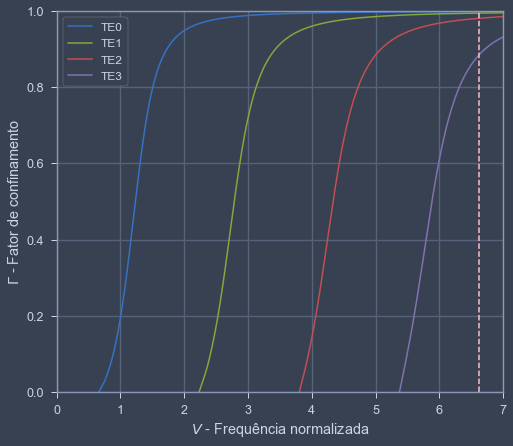

In [ ]:
Facoplamento = np.zeros(nm)
for m in range(nm):
    Facoplamento[m] = (1 + ((np.sin(u[m]-phi[m])**2)/(2*v[m])) + ((np.sin(u[m]+phi[m])**2)/(2*w[m])))/(1 + 1/(2*v[m]) + 1/(2*w[m]))

    (1 + (np.sin(u[m]+phi[m])**2)/(2*w[m]) + (np.sin(u[m]-phi[m])**2)/(2*v[m]))/(1 + (np.sin(u[m]-phi[m])**2)/(2*v[m]) + (np.sin(u[m]+phi[m])**2)/(2*w[m]) + (ps*np.cos(u[m]-phi[m])**2)/(2*v[m]) + (pc*np.cos(u[m]+phi[m])**2)/(2*w[m]) )
    print("Para TM{0}: Fator de acoplamento = {1}".format(m,round(Facoplamento[m],arredondamento)))

for m in range(nm):
    vf  = np.sqrt(b)*Vm[m]
    uf  = np.sqrt(1-b)*Vm[m]
    wf  = np.sqrt(sigma*Vm[m]**2 + vf**2)
    phif = (m*np.pi + np.arctan(pc*wf/uf) - np.arctan(ps*vf/uf))/2
    pcore = (1+(np.sin(uf+phif)**2)/(2*wf) + (np.sin(uf-phif)**2)/(2*vf))
    pt = (1 + (np.sin(uf-phif)**2)/(2*vf) + (np.sin(uf+phif)**2)/(2*wf) + (ps*np.cos(uf-phif)**2)/(2*vf) + (pc*np.cos(uf+phif)**2)/(2*wf))
    plt.plot(Vm[m], pcore/pt, label = 'TE{0}'.format(m))

plt.ylabel(r'$\Gamma$ - Fator de confinamento')
plt.xlabel(r'$V$ - Frequência normalizada')
plt.xlim([0, np.ceil(Vescolhido)])
plt.ylim([0, 1])
plt.legend(loc = 'upper left', framealpha = 1, fontsize = 12)
plt.axvline(Vescolhido,label = "V",color="pink",ls='--');